<a href="https://colab.research.google.com/github/Kaiwen-d/ML-project/blob/main/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
%matplotlib inline

annotation_dir = './annotations/' # os.path.join(os.getcwd(), 'dataset', 'annotations')
img_dir = './images/' # os.path.join(os.getcwd(),'dataset','images')  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from os import chdir, listdir

print(listdir('./'))

chdir('/content/drive/MyDrive/Sem_3/ML/F20_ML_final_project/preprocessing/dataset')

print(listdir('./'))

['.config', 'drive', 'sample_data']
['.DS_Store', 'annotations', 'images', 'obj_dict.dat', 'obj_dict_1122.dat']


In [ ]:
def get_obj_list():
    return list(pickle.load(open('./obj_dict.dat', 'rb')).keys())

def get_obj(k_list):
    obj_dict = pickle.load(open('./obj_dict.dat', 'rb'))
    return [(obj_dict[k] if k in obj_dict else 'No such a key.') for k in k_list]

def update_obj_dict(k, v):
    obj_dict = pickle.load(open('./obj_dict.dat', 'rb'))
    # if k in obj_dict:
    #     obj_dict['prev_' + k] = obj_dict[k]
    obj_dict[k] = v
    pickle.dump(obj_dict, open('./obj_dict.dat', 'wb'))

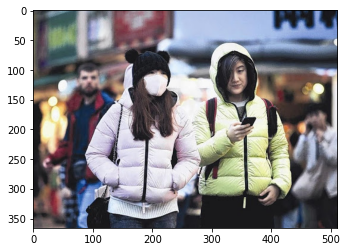

In [ ]:
#take a look at one of the pictures in the dataset
img = cv2.imread(img_dir+ '/maksssksksss0.png')
plt.imshow(img[:, :, ::-1])

We noticed that one picture could contain more than one people. For the picture above, the corresponding annotation recorded three objects (Two of them are labeled as 'without_mask', one labeled as 'with_mask')

The task is to preprocess the raw dataset. From the XML files, we can read the filepath of the corresponding image, and all the informations about the objects in the image, including their label (with mask or not, or weared incorrectly) and the Region of Interest. 

We need to get the Region of Interest of each object and their label.

In [ ]:
ann_file_names = os.listdir(annotation_dir)
print('File Num =', len(ann_file_names))
print(ann_file_names[:5])

ann_flag = [('maksssksksss' + str(i) + '.xml' in ann_file_names) for i in range(853)]
print('Annotation Num =', 853 - ann_flag.count(False))

File Num = 862
['maksssksksss0.xml', 'maksssksksss390.xml', 'maksssksksss252.xml', 'maksssksksss20.xml', 'maksssksksss178.xml']
Annotation Num = 853


In [ ]:
ann_data = []

# define a funtion to get infomations of an object. Return a list showing the label and the ROI [label, xmin, xmax, ymin, ymax]
def get_object_data(obj):
    label = obj.find('name').text
    box = obj.find('bndbox')
    xmin = int(box.find('xmin').text)
    xmax = int(box.find('xmax').text)
    ymin = int(box.find('ymin').text)
    ymax = int(box.find('ymax').text)
    return (label, xmin, xmax, ymin, ymax)

for i in range(853):
    ann_path = annotation_dir + 'maksssksksss' + str(i) + '.xml'
    tree = ET.parse(ann_path)

    img_path = img_dir + tree.find('filename').text
    obj_data = [get_object_data(obj) for obj in tree.findall('object')]

    ann_data.append({'img_path': img_path, 'obj_data': obj_data})

print(ann_data)

update_obj_dict('ann_data', ann_data)

[{'img_path': './images/maksssksksss0.png', 'obj_data': [('without_mask', 79, 109, 105, 142), ('with_mask', 185, 226, 100, 144), ('without_mask', 325, 360, 90, 141)]}, {'img_path': './images/maksssksksss1.png', 'obj_data': [('with_mask', 321, 354, 34, 69), ('with_mask', 224, 261, 38, 73), ('with_mask', 299, 315, 58, 81), ('with_mask', 143, 174, 74, 115), ('with_mask', 74, 95, 69, 99), ('with_mask', 191, 221, 67, 93), ('with_mask', 21, 44, 73, 93), ('with_mask', 369, 398, 70, 99), ('without_mask', 83, 111, 56, 89)]}, {'img_path': './images/maksssksksss2.png', 'obj_data': [('with_mask', 68, 105, 42, 69), ('with_mask', 154, 178, 47, 74), ('with_mask', 238, 262, 34, 69), ('mask_weared_incorrect', 333, 366, 31, 65)]}, {'img_path': './images/maksssksksss3.png', 'obj_data': [('with_mask', 52, 73, 53, 76), ('with_mask', 72, 92, 53, 75), ('with_mask', 112, 120, 51, 68), ('with_mask', 155, 177, 60, 83), ('with_mask', 189, 210, 59, 80), ('with_mask', 235, 257, 57, 78), ('with_mask', 289, 309, 60,

In [ ]:
get_obj(['ann_data'])[0][:5]

[{'img_path': './images/maksssksksss0.png',
  'obj_data': [('without_mask', 79, 109, 105, 142),
   ('with_mask', 185, 226, 100, 144),
   ('without_mask', 325, 360, 90, 141)]},
 {'img_path': './images/maksssksksss1.png',
  'obj_data': [('with_mask', 321, 354, 34, 69),
   ('with_mask', 224, 261, 38, 73),
   ('with_mask', 299, 315, 58, 81),
   ('with_mask', 143, 174, 74, 115),
   ('with_mask', 74, 95, 69, 99),
   ('with_mask', 191, 221, 67, 93),
   ('with_mask', 21, 44, 73, 93),
   ('with_mask', 369, 398, 70, 99),
   ('without_mask', 83, 111, 56, 89)]},
 {'img_path': './images/maksssksksss2.png',
  'obj_data': [('with_mask', 68, 105, 42, 69),
   ('with_mask', 154, 178, 47, 74),
   ('with_mask', 238, 262, 34, 69),
   ('mask_weared_incorrect', 333, 366, 31, 65)]},
 {'img_path': './images/maksssksksss3.png',
  'obj_data': [('with_mask', 52, 73, 53, 76),
   ('with_mask', 72, 92, 53, 75),
   ('with_mask', 112, 120, 51, 68),
   ('with_mask', 155, 177, 60, 83),
   ('with_mask', 189, 210, 59, 80)

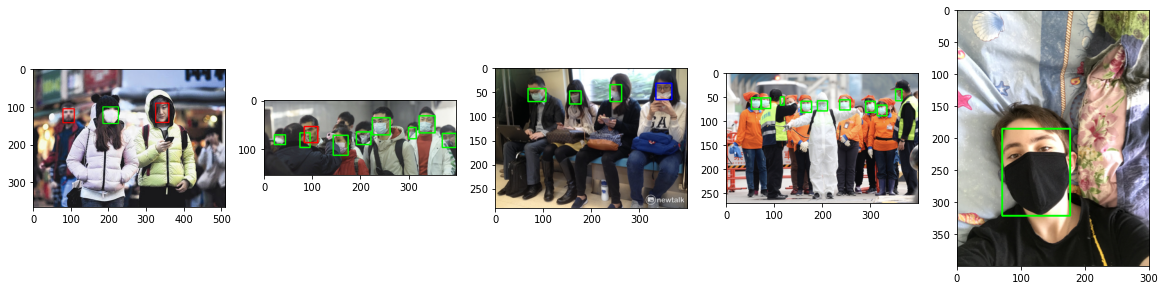

In [ ]:
fig= plt.figure(figsize = (20,10))
label_color = {'with_mask':(0, 255, 0),'without_mask':(255, 0, 0), 'mask_weared_incorrect':(0, 0, 255)}
for i in range(5):
    path = ann_data[i]['img_path']
    raw_img = cv2.imread(path)
    img = cv2.merge((raw_img[:, :, 2], raw_img[:, :, 1], raw_img[:, :, 0]))
    for label, xmin, xmax, ymin, ymax in ann_data[i]['obj_data']:
        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), label_color[label], 2)
    fig.add_subplot(1, 5, i+1)
    plt.imshow(img)

In [ ]:
face_data = []
label_data = []
face_size_data = []

for i in range(len(ann_data)):
    img = cv2.imread(ann_data[i]['img_path'])
    for label, xmin, xmax, ymin, ymax in ann_data[i]['obj_data']:
        raw_face = img[ymin:ymax, xmin:xmax]
        face = cv2.merge((raw_face[:, :, 2], raw_face[:, :, 1], raw_face[:, :, 0]))
        face_data.append(face)
        label_data.append(label)
        face_size_data.append(int(((xmax - xmin) * (ymax - ymin)) ** 0.5))

In [ ]:
update_obj_dict('face_data', face_data)
update_obj_dict('label_data', label_data)
update_obj_dict('face_size_data', face_size_data)

In [ ]:
get_obj_list()

['ann_data',
 'prev_ann_data',
 'face_data',
 'label_data',
 'face_size_data',
 'prev_face_data',
 'prev_label_data',
 'prev_face_size_data']

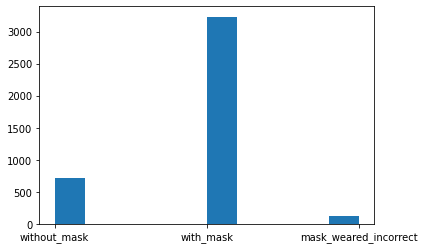

In [ ]:
plt.hist(label_data);
plt.show()

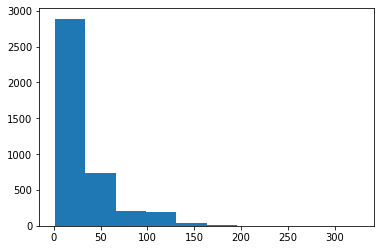

In [ ]:
plt.hist(face_size_data);
plt.show()

[Index]: 283
[Label]: with_mask


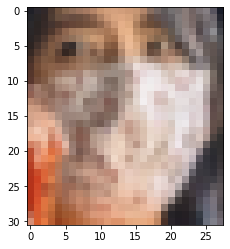

In [ ]:
from random import randint
idx = randint(0, 853)
print('[Index]:', idx)
print('[Label]:', label_data[idx])
plt.imshow(face_data[idx])

In [ ]:
def compare_filter_size(size_list = [24]):
    face_size_list = [[] for i in range(len(size_list))]
    valid_face_count = [0 for i in range(len(size_list))]
    valid_face_label_list = [[] for i in range(len(size_list))]
    for i in range(len(ann_data)):
        for label, xmin, xmax, ymin, ymax in ann_data[i]['obj_data']:
            x, y = xmax - xmin, ymax - ymin
            for j in range(len(size_list)):
                if (x >= size_list[j]) and (y >= size_list[j]):
                    valid_face_count[j] += 1
                    face_size_list[j].append(int((x * y) ** 0.5))
                    valid_face_label_list[j].append(label)
    return valid_face_count, valid_face_label_list, face_size_list

size_list = [1, 16, 20, 24, 32, 40, 48]
vfc, vfll, fsl = compare_filter_size(size_list)

for i in range(len(size_list)):
    print('Size %02d: %4d' % (size_list[i], vfc[i]))

print()

for i in range(len(size_list)):
    print('Size %02d: C_masked = %04d, U_masked: %04d, I_masked: %04d' % (size_list[i],vfll[i].count('with_mask'), vfll[i].count('without_mask'), vfll[i].count('mask_weared_incorrect')))

# fig = plt.figure(figsize = (16, 16))
# plt.bar(size_list, vfc)

# for i in range(len(size_list)):
#     # print(vfll[i])
#     fig.add_subplot(4, 2, i + 1)
#     plt.hist(vfll[i]);
#     plt.xlabel('size =' + str(size_list[i]))
# plt.show()

Size 01: 4072
Size 16: 2800
Size 20: 2252
Size 24: 1783
Size 32: 1201
Size 40:  856
Size 48:  645

Size 01: C_masked = 3232, U_masked: 0717, I_masked: 0123
Size 16: C_masked = 2287, U_masked: 0418, I_masked: 0095
Size 20: C_masked = 1854, U_masked: 0317, I_masked: 0081
Size 24: C_masked = 1468, U_masked: 0246, I_masked: 0069
Size 32: C_masked = 0996, U_masked: 0150, I_masked: 0055
Size 40: C_masked = 0708, U_masked: 0108, I_masked: 0040
Size 48: C_masked = 0536, U_masked: 0080, I_masked: 0029


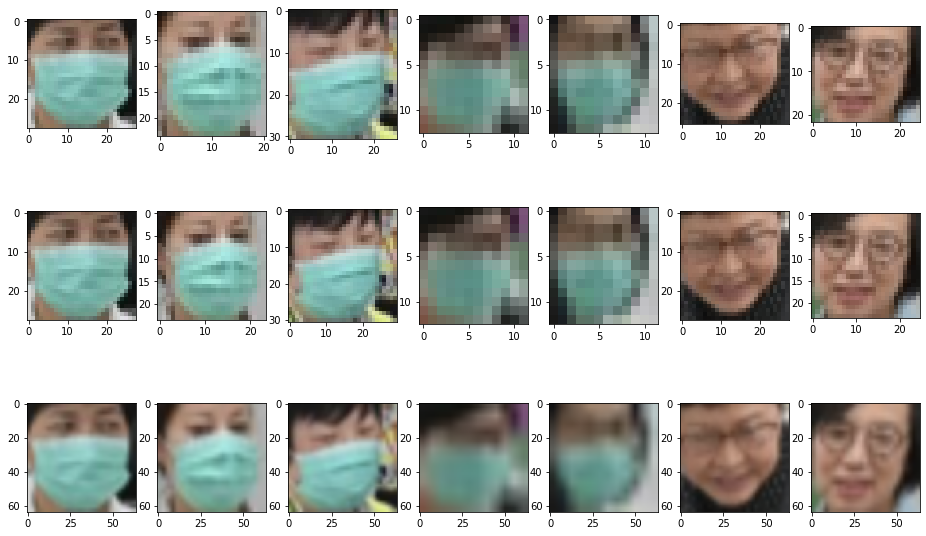

In [ ]:
filtered_face_data = []
filtered_label_data = []
filtered_face_size_data = []

def recrop_to_square(x_min, x_max, y_min, y_max, x_ub, y_ub):
    x, y = x_max - x_min, y_max - y_min
    if x < y:
        x_mid = (x_max + x_min) // 2
        return max((x_mid - y // 2), 0), min((x_mid + y // 2), x_ub), y_min, y_max
    else:
        y_mid = (y_max + y_min) // 2
        return x_min, x_max, max((y_mid - x // 2), 0), min((y_mid + x // 2), y_ub)

def recrop_one_img(idx = 119):

    path = ann_data[idx]['img_path']
    raw_img = cv2.imread(path)
    img = cv2.merge((raw_img[:, :, 2], raw_img[:, :, 1], raw_img[:, :, 0]))

    fig = plt.figure(figsize = (16, 10))
    t = len(ann_data[idx]['obj_data'])
    c = 1
    for label, xmin, xmax, ymin, ymax in ann_data[idx]['obj_data']:
        xmin_, xmax_, ymin_, ymax_ = recrop_to_square(xmin, xmax, ymin, ymax, img.shape[1], img.shape[0])
        img1 = img[ymin:ymax, xmin:xmax]
        img2 = img[ymin_:ymax_, xmin_:xmax_]
        img3 = cv2.resize(img2, (64, 64))

        fig.add_subplot(3, t, c)
        plt.imshow(img1)
        fig.add_subplot(3, t, t + c)
        plt.imshow(img2)
        fig.add_subplot(3, t, 2 * t + c)
        plt.imshow(img3)
        c += 1

recrop_one_img(119)

In [ ]:
def filter_face(bound = 20):
    resized_dataset = {}
    resized_data = []
    for i in range(len(ann_data)):
        for label, xmin, xmax, ymin, ymax in ann_data[i]['obj_data']:
            x, y = xmax - xmin, ymax - ymin
            if (x >= bound) and (y >= bound):
                raw_img = cv2.imread(ann_data[i]['img_path'])
                img = cv2.merge((raw_img[:, :, 2], raw_img[:, :, 1], raw_img[:, :, 0]))
                xmin_, xmax_, ymin_, ymax_ = recrop_to_square(xmin, xmax, ymin, ymax, img.shape[1], img.shape[0])
                if abs(xmax_ + ymin_ - xmin_ - ymax_) <= 3:
                    # print(xmax_ - xmin_, ymax_ - ymin_)
                    resized_face = cv2.resize(img[ymin_:ymax_, xmin_:xmax_], (64, 64))
                    resized_data.append({'face': resized_face, 'label': label})
    resized_dataset['data'] = resized_data

    resized_label = {'with_mask': [], 'without_mask': [], 'mask_weared_incorrect': []}
    for i in range(len(resized_data)):
        resized_label[resized_data[i]['label']].append(i)
    resized_dataset['label_idx'] = resized_label

    return resized_dataset

filter_20_dataset = filter_face(bound = 20)

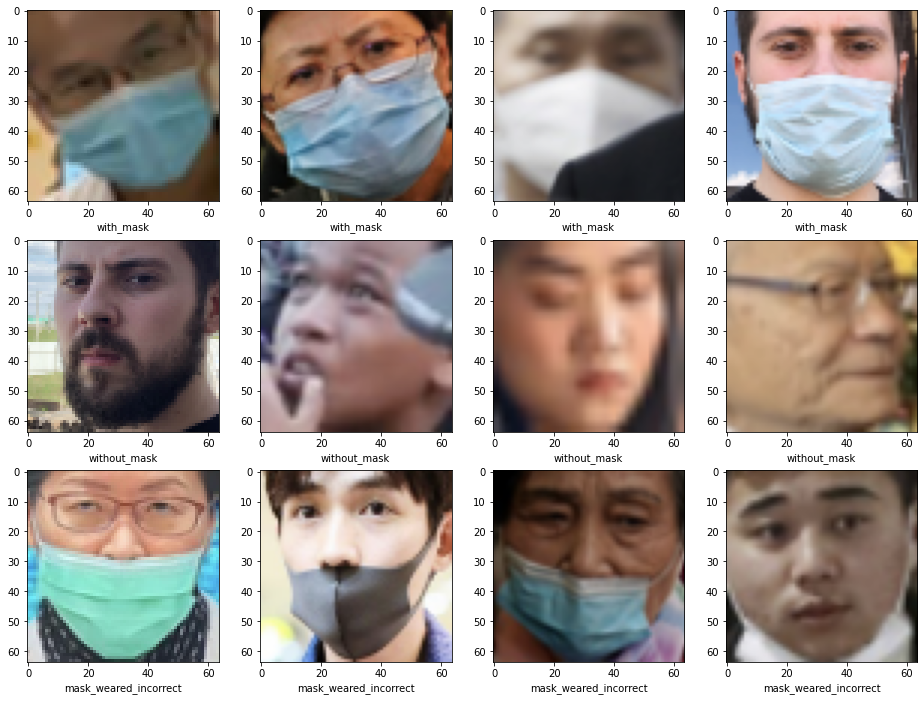

In [ ]:
from random import choices

fig = plt.figure(figsize = (16, 12))

random_idx_list = []
for label in filter_20_dataset['label_idx']:
    random_idx_list += choices(filter_20_dataset['label_idx'][label], k = 4)

for i in range(len(random_idx_list)):
    fig.add_subplot(3, 4, i + 1)
    plt.imshow(filter_20_dataset['data'][random_idx_list[i]]['face'])
    plt.xlabel(filter_20_dataset['data'][random_idx_list[i]]['label'])

In [ ]:
update_obj_dict('filter_20_dataset', filter_20_dataset)

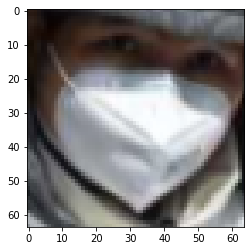

In [ ]:
def read_and_show_face(idx = 1926):
    obj_dict = pickle.load(open('./obj_dict.dat', 'rb'))
    plt.imshow(obj_dict['filter_20_dataset']['data'][idx]['face'])

def get_face(dataset, idx = 1926, fetch = False):
    if fetch:
        return dataset['data'][idx]['face']
    else:
        plt.imshow(dataset['data'][idx]['face'])

read_and_show_face()

In [ ]:
obj_dict = pickle.load(open('./obj_dict.dat', 'rb'))

f20d = get_obj(['filter_20_dataset'])[0]

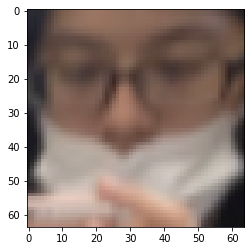

In [ ]:
I_masked = f20d['label_idx']['mask_weared_incorrect']
test_idx = I_masked[0]

test_img = get_face(f20d, test_idx, True)

get_face(f20d, test_idx)

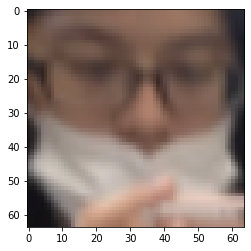

In [ ]:
flipped_test_img = cv2.flip(test_img, 1)
plt.imshow(flipped_test_img)

In [ ]:
I_masked_ = I_masked[:]
test_data = f20d['data'][:]

# print(type(f20d['data']))

for idx in I_masked:
    label = f20d['data'][idx]['label']
    flipped_img = cv2.flip(f20d['data'][idx]['face'], 1)

    I_masked_.append(len(test_data))
    test_data.append({'face': flipped_img, 'label': label})

79 158


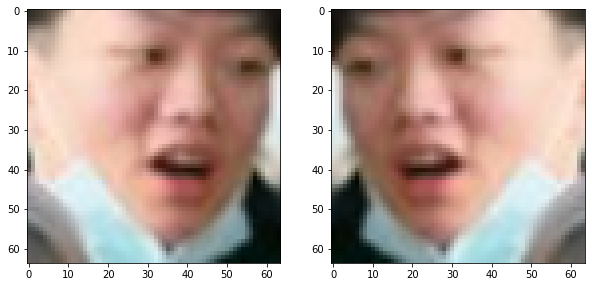

In [ ]:
from random import randint

print(len(I_masked), len(I_masked_))

test_idx_1 = randint(0, len(I_masked)-1)
test_idx_2 = len(I_masked) + test_idx_1

fig = plt.figure(figsize = (10, 8))
fig.add_subplot(1, 2, 1)
plt.imshow(test_data[I_masked_[test_idx_1]]['face'])
fig.add_subplot(1, 2, 2)
plt.imshow(test_data[I_masked_[test_idx_2]]['face'])
plt.show()

In [ ]:
label_idx_ = f20d['label_idx'].copy()
# print(label_idx_)
label_idx_['mask_weared_incorrect'] = I_masked_
added_f20d = {'data': test_data, 'label_idx': label_idx_}

print('all', len(added_f20d['data']))
for k, v in added_f20d['label_idx'].items():
    print(k, len(v))

all 2277
with_mask 1811
without_mask 308
mask_weared_incorrect 158


In [ ]:
update_obj_dict('added_filter_20_dataset', added_f20d)

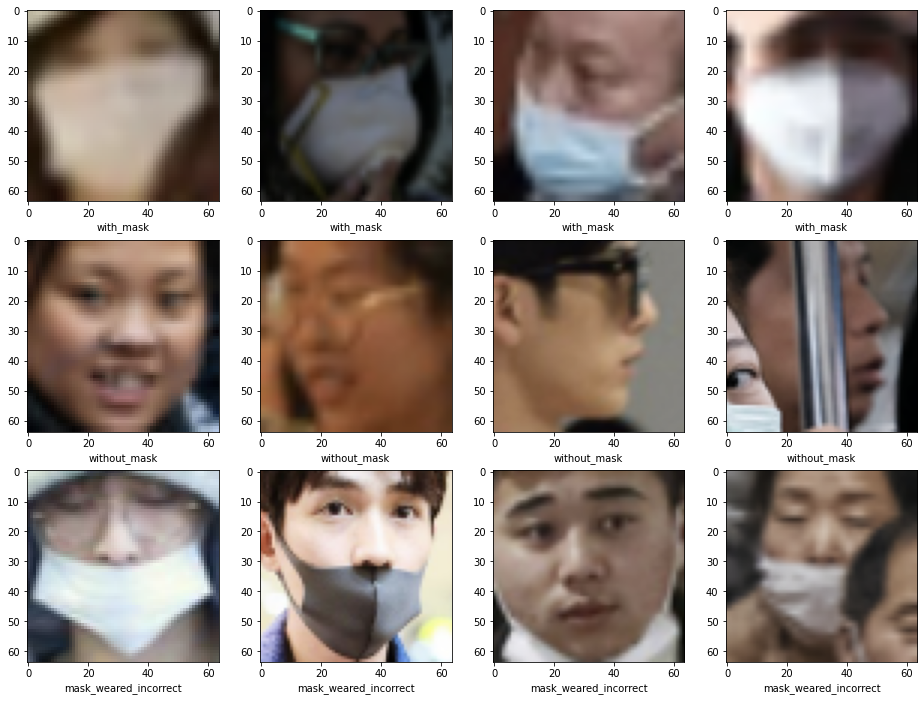

In [ ]:
from random import choices

fig = plt.figure(figsize = (16, 12))

random_idx_list = []
for label in added_f20d['label_idx']:
    random_idx_list += choices(added_f20d['label_idx'][label], k = 4)

for i in range(len(random_idx_list)):
    fig.add_subplot(3, 4, i + 1)
    plt.imshow(added_f20d['data'][random_idx_list[i]]['face'])
    plt.xlabel(added_f20d['data'][random_idx_list[i]]['label'])